In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'

In [2]:
# 1. 데이터 로드 및 기본 정보 확인
# 주어진 주식 데이터 파일을 불러옴
file_path = "../data/stock_data.csv"  # 실제 데이터 파일 경로
df = pd.read_csv(file_path)  # 데이터 파일을 불러오는 코드 작성


In [3]:
# 데이터의 첫 5행 출력 (EDA의 첫 단계)
print("데이터 미리보기")
df.head()

데이터 미리보기


,Date,Close
0,2023-01-02,95.50
1,2023-01-03,95.36
2,2023-01-04,96.01
3,2023-01-05,97.53
4,2023-01-06,97.30


In [4]:
# 데이터의 기본 정보 확인 (컬럼명, 데이터 타입, 결측값 확인)
print("\n데이터 정보")
df.info()


데이터 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    260 non-null    object 
 1   Close   259 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [5]:
# 2. 필요한 컬럼 선택 및 데이터 변환
# 'Date' 컬럼을 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'])  # 날짜 데이터를 datetime 타입으로 변환

# 'Close' 컬럼의 결측값 제거
df = df[['Date', 'Close']].dropna()  # 종가 값이 없는 경우 제거()

df

,Date,Close
0,2023-01-02,95.50
1,2023-01-03,95.36
2,2023-01-04,96.01
3,2023-01-05,97.53
4,2023-01-06,97.30
...,...,...
255,2023-12-25,95.20
256,2023-12-26,96.47
257,2023-12-27,95.76
258,2023-12-28,96.21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 259 entries, 0 to 259
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    259 non-null    datetime64[ns]
 1   Close   259 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.1 KB


In [7]:
# 3. 월별 종가 평균 계산
# Date 컬럼을 기준으로 연-월 형태의 새로운 컬럼 생성 (YYYY-MM 형식)
df['YearMonth'] = df['Date'].dt.strftime('%Y-%m')

# 각 월별 종가의 평균 계산
monthly_avg_close = df.groupby('YearMonth')['Close'].mean().reset_index()

In [9]:
monthly_avg_close.head()

,YearMonth,Close
0,2023-01,96.186364
1,2023-02,89.379000
2,2023-03,84.641304
3,2023-04,86.282500
4,2023-05,84.543913


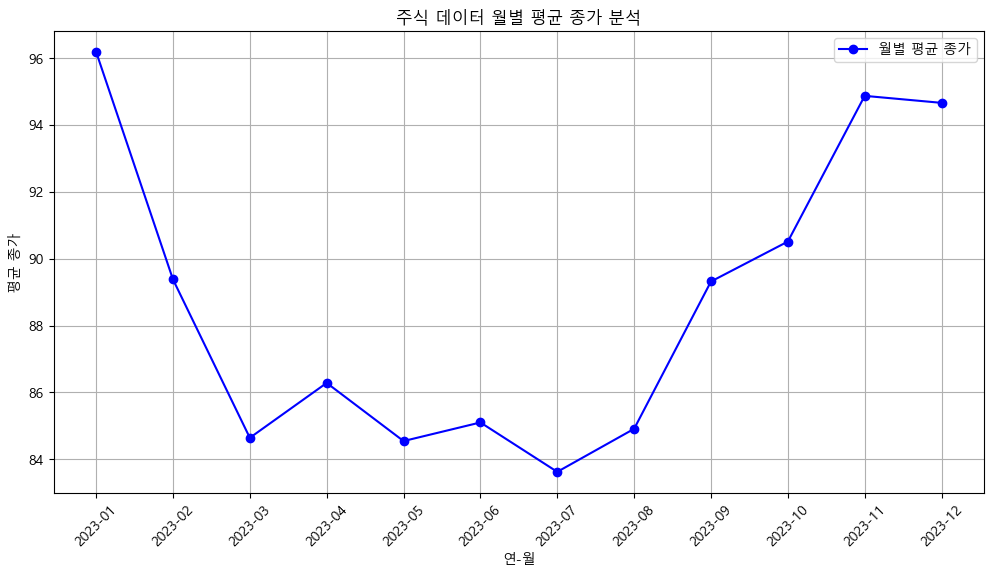

In [10]:
# 4. 데이터 시각화 (월별 평균 종가)
plt.figure(figsize=(12, 6))  # 그래프 크기 설정
plt.plot(monthly_avg_close["YearMonth"].astype(str),monthly_avg_close["Close"] , marker='o', linestyle='-', color='b', label='월별 평균 종가')

# 그래프 제목 및 라벨 설정
plt.title('주식 데이터 월별 평균 종가 분석')
plt.xlabel('연-월')
plt.ylabel('평균 종가')
plt.xticks(rotation=45)  # X축 라벨 회전
plt.legend()
plt.grid(True)  # 격자 추가

# 그래프 출력
plt.show()

In [11]:
# 5. 결과 해석

# 1. 주어진 데이터를 활용하여 월별 평균 종가를 계산하였음.
# 2. 시각화를 통해 시간에 따른 평균 종가 변화를 파악할 수 있음.
# 3. 특정 월에 급격한 상승 또는 하락이 있다면, 외부 요인(예: 경제 이벤트, 시장 변동성 등)을 고려해야 함.
# 4. 평균 종가 변동이 일정하다면, 해당 주식은 안정적인 패턴을 보이는 것으로 해석 가능.
